# Document Splitting ( Chunking Best Practices) with LangChain
- Are you doing chunking properly ?
- What is the default splitter ?
- Chunk_size ?
- Chunk_overlap ?
- Are there different splitters ??
- Its easy, just chunk and that's it, really ? 

We will go through  👇
- CharacterTextSplitter
- RecursiveCharacterTextSplitter
- TokenTextSplitter
- MarkdownHeaderTextSplitter

### Document splitting happens after document loading and before embeddings.
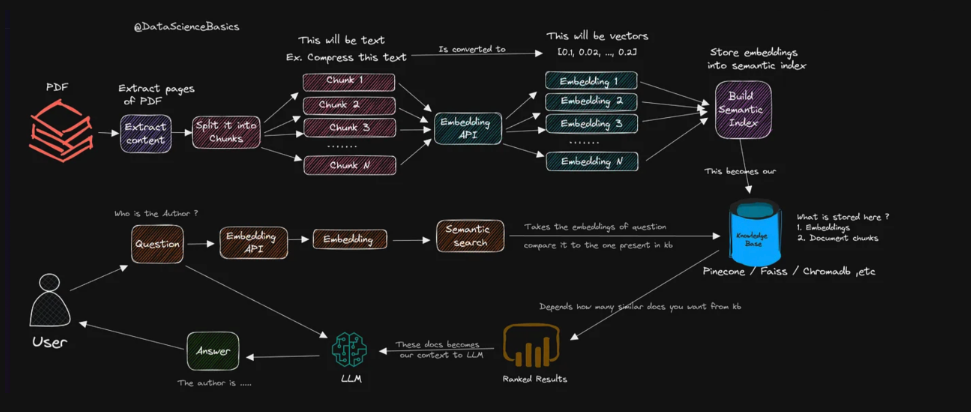

#### Why needed ?
- While answering, the answer might be in different chunks, no correct answer.

In [2]:
import langchain.text_splitter

# Get all the classes from the langchain.text_splitter module
classes = [cls for cls in dir(langchain.text_splitter) if isinstance(getattr(langchain.text_splitter, cls), type)]

# Print all the classes
for cls in classes:
    print(cls)

CharacterTextSplitter
ElementType
HTMLHeaderTextSplitter
HeaderType
KonlpyTextSplitter
Language
LatexTextSplitter
LineType
MarkdownHeaderTextSplitter
MarkdownTextSplitter
NLTKTextSplitter
PythonCodeTextSplitter
RecursiveCharacterTextSplitter
RecursiveJsonSplitter
SentenceTransformersTokenTextSplitter
SpacyTextSplitter
TextSplitter
TokenTextSplitter
Tokenizer


In [4]:
#langchain.text_splitter.Language??

### Let's dive in (just with 4 mostly used ones)

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [6]:
chunk_size =26
chunk_overlap = 4

In [7]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [8]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [9]:
len(text1)

26

In [10]:
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [11]:
c_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

##### Longer than 26 characters 

In [12]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [13]:
len(text2)

33

In [14]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

In [15]:
c_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyzabcdefg']

In [17]:
RecursiveCharacterTextSplitter??

Init signature:
RecursiveCharacterTextSplitter(
    separators: 'Optional[List[str]]' = None,
    keep_separator: 'bool' = True,
    is_separator_regex: 'bool' = False,
    **kwargs: 'Any',
) -> 'None'
Source:        
class RecursiveCharacterTextSplitter(TextSplitter):
    """Splitting text by recursively look at characters.

    Recursively tries to split by different characters to find one
    that works.
    """

    def __init__(
        self,
        separators: Optional[List[str]] = None,
        keep_separator: bool = True,
        is_separator_regex: bool = False,
        **kwargs: Any,
    ) -> None:
        """Create a new TextSplitter."""
        super().__init__(keep_separator=keep_separator, **kwargs)
        self._separators = separators or ["\n\n", "\n", " ", ""]
        self._is_separator_regex = is_separator_regex

    def _split_text(self, text: str, separators: List[str]) -> List[str]:
        """Split incoming text and return chunks."""
        final_chunks = []
   

##### How does it work with space between characters ?

In [18]:
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"

In [19]:
len(text3)

51

In [20]:
r_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

In [21]:
c_splitter.split_text(text3)

['a b c d e f g h i j k l m n o p q r s t u v w x y z']

#### Hmm, why is CharacterTextSplitter not splitting might be the question. Lets Investigate.

In [ ]:
#CharacterTextSplitter?? #splits on single character and by default its new line 

In [ ]:
#RecursiveCharacterTextSplitter??

In [22]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size, #26
    chunk_overlap=chunk_overlap, #4
    separator = ' '
)
c_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

In [23]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=0,
    separator = ' '
)
c_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'n o p q r s t u v w x y z']

## Recursive splitting details

`RecursiveCharacterTextSplitter` is recommended for generic text. 

In [24]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentences. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

In [25]:
len(some_text)

496

In [26]:
c_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' ' #space as separator
)
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0, 
    separators=["\n\n", "\n", " ", ""] # list of separators [double new lines, new lines, space and nothing] [goes from left to right]
)

In [42]:
c_splitter.split_text(some_text)

['When writing documents, writers will use document structure to group content. This can convey to the reader, which idea\'s are related. For example, closely related ideas are in sentences. Similar ideas are in paragraphs. Paragraphs form a document. \n\n Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also,',
 'have a space.and words are separated by space.']

In [44]:
len(c_splitter.split_text(some_text))

2

Let's reduce the chunk size a bit and add a period to our separators:

In [45]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "\. ", " ", ""]
)
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example,",
 'closely related ideas are in sentences. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this',
 'string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [46]:
split = r_splitter.split_text(some_text)

In [47]:
len(split)

4

In [48]:
for i in split:
    print(i)

When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example,
closely related ideas are in sentences. Similar ideas are in paragraphs. Paragraphs form a document.
Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this
string. Sentences have a period at the end, but also, have a space.and words are separated by space.


In [49]:
splits = r_splitter.split_text(some_text)
for i, split in enumerate(splits, 1):
    print(f"Split {i}: {len(split)} characters")

Split 1: 147 characters
Split 2: 100 characters
Split 3: 142 characters
Split 4: 100 characters


In [50]:
print(len(some_text))

print(len(r_splitter.split_text(some_text)))

496
4


### Now, lets test with PDF

In [51]:
%pip install pypdf -q


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("data/gpt4all.pdf")
pages = loader.load()

In [53]:
len(pages)

6

In [59]:
pages[1]

Document(page_content='las, we identified and removed subsets of the data where\nGPT-3.5-Turbo refused to respond, had malformed out-\nput, or produced a very short response. This resulted in\nthe removal of the entire Bigscience/P3 subset of our\ndata, as many P3 prompts induced responses that were\nsimply one word. After curation, we were left with a set\nof 437,605 prompt-response pairs, which we visualize\nin Figure 1a.\n2.2 Model Training\nThe original GPT4All model was a fine tuned variant\nof LLaMA 7B. In order to train it more efficiently, we\nfroze the base weights of LLaMA, and only trained a\nsmall set of LoRA (Hu et al., 2021) weights during the\nfine tuning process. Detailed model hyper-parameters\nand training code can be found in our associated code\nrepository1.\n2.3 Model Access\nWe publicly released all data, training code, and model\nweights for the community to build upon. Further, we\nprovided a 4-bit quantized version of the model, which\nenabled users to run it o

`length_function=len:` This parameter specifies a function to determine the length of the text. In this case, it uses the built-in len function, which returns the number of characters in a string.

In [55]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

In [56]:
docs = text_splitter.split_documents(pages)

In [57]:
len(docs)

28

In [61]:
docs[5]

Document(page_content='las, we identified and removed subsets of the data where\nGPT-3.5-Turbo refused to respond, had malformed out-\nput, or produced a very short response. This resulted in\nthe removal of the entire Bigscience/P3 subset of our\ndata, as many P3 prompts induced responses that were\nsimply one word. After curation, we were left with a set\nof 437,605 prompt-response pairs, which we visualize\nin Figure 1a.\n2.2 Model Training\nThe original GPT4All model was a fine tuned variant\nof LLaMA 7B. In order to train it more efficiently, we\nfroze the base weights of LLaMA, and only trained a\nsmall set of LoRA (Hu et al., 2021) weights during the\nfine tuning process. Detailed model hyper-parameters\nand training code can be found in our associated code\nrepository1.\n2.3 Model Access\nWe publicly released all data, training code, and model\nweights for the community to build upon. Further, we\nprovided a 4-bit quantized version of the model, which\nenabled users to run it o

In [58]:
len(pages)

6

## Token splitting [Helper tool](https://platform.openai.com/tokenizer)

We can also split on token count explicity, if we want.

This can be useful because LLMs often have context windows designated in tokens.

Tokens are often ~4 characters.

In [62]:
from langchain.text_splitter import TokenTextSplitter

In [63]:
%pip install tiktoken -q


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [64]:
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)

In [67]:
text1 = "applemangoappmango"

In [68]:
text_splitter.split_text(text1)

['app', 'lem', 'ango', 'app', 'm', 'ango']

In [69]:
text_splitter = TokenTextSplitter(chunk_size=10, chunk_overlap=0)

In [70]:
docs = text_splitter.split_documents(pages)

In [73]:
len(docs)

714

In [71]:
docs[0]

Document(page_content='GPT4All: An Ecosystem of Open', metadata={'source': 'data/gpt4all.pdf', 'page': 0})

In [72]:
pages[0].metadata

{'source': 'data/gpt4all.pdf', 'page': 0}

## Context aware splitting

Chunking aims to keep text with common context together.

A text splitting often uses sentences or other delimiters to keep related text together but many documents (such as Markdown) have structure (headers) that can be explicitly used in splitting.

We can use `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks, as show below.

In [74]:
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [75]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n 
## Chapter 2\n\n \
Hi this is Molly"""

In [76]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [77]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)

In [78]:
len(md_header_splits)

3

In [79]:
md_header_splits[0]

Document(page_content='Hi this is Jim  \nHi this is Joe', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'})

In [80]:
md_header_splits[1]

Document(page_content='Hi this is Lance', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1', 'Header 3': 'Section'})

#### Try on a real Markdown file, uber_10q data in markdown by [Llamaparse](https://youtu.be/wRMnHbiz5ck?si=3GMl2p0j8UtyodtC).

In [81]:
with open("data/uber_10q_march_2022.md", "r") as f:
    markdown_text = f.read()

In [82]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)

In [83]:
md_header_splits = markdown_splitter.split_text(markdown_text)

In [84]:
len(md_header_splits)

288

In [85]:
md_header_splits[0]

Document(page_content='Quarterly Report Pursuant to Section 13 or 15(d) of the Securities Exchange Act of 1934 for the quarterly period ended March 31, 2022', metadata={'Header 1': 'Uber Technologies, Inc. - Form 10-Q'})

In [86]:
md_header_splits[200]

Document(page_content="Uber tracks operational metrics internally, including MAPCs, Trips, and Gross Bookings, as well as its category position. However, these metrics may face challenges in measurement, and inaccuracies could harm the company's reputation and business performance.  \nIt is important to note that the information provided here is a summary and may not cover all details included in the complete quarterly report filed by Uber Technologies, Inc. with the SEC.\n---", metadata={'Header 1': 'Uber Technologies, Inc. Quarterly Report', 'Header 2': 'Operational Metrics and Challenges'})